import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df=pd.read_csv("I:\DATA SCIENCE\city_day.csv")
df

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02    0.00   NaN           NaN  
1       0.97  24.55   34.06     3.68     5.50    3.77   NaN           NaN  
2      17.40  29.07   30.70     6.80    16.40    2.25   NaN           NaN  
3       1.70  18.59   36.08     4.43    10.14    1.00   NaN           NaN  
4      22.10  39.33   39.31     7.01    18.89    2.78   NaN           NaN  
...      ...    ...     ...      ...      ...     ...   ...           ...  
29526   0.47   8.55   23.30     2.24    12.07    0.73  41.0          Good  
29527   0.52  12.72   30.14     0.74     2.21    0.38  70.0  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01    0.00  68.0  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00    0.00  54.0  Satisfactory  
29530   0.59   2.10   17.05      NaN      NaN     NaN  50.0          Good  

[29531 rows x 16 columns]

In [3]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 8.4 MB


In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [7]:
df=df.fillna(0)

In [8]:
# Extract the day, month, and year into separate columns
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [9]:
df.head()

City       Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    0.0   0.0   0.92  18.22  17.15  0.0   0.92  27.64   
1  Ahmedabad 2015-01-02    0.0   0.0   0.97  15.69  16.46  0.0   0.97  24.55   
2  Ahmedabad 2015-01-03    0.0   0.0  17.40  19.30  29.70  0.0  17.40  29.07   
3  Ahmedabad 2015-01-04    0.0   0.0   1.70  18.48  17.97  0.0   1.70  18.59   
4  Ahmedabad 2015-01-05    0.0   0.0  22.10  21.42  37.76  0.0  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  Month  Year  
0  133.36     0.00     0.02    0.00  0.0          0      1  2015  
1   34.06     3.68     5.50    3.77  0.0          0      1  2015  
2   30.70     6.80    16.40    2.25  0.0          0      1  2015  
3   36.08     4.43    10.14    1.00  0.0          0      1  2015  
4   39.31     7.01    18.89    2.78  0.0          0      1  2015

In [10]:
df.tail()

City       Date  PM2.5   PM10    NO    NO2    NOx    NH3  \
29526  Visakhapatnam 2020-06-27  15.02  50.94  7.68  25.06  19.54  12.47   
29527  Visakhapatnam 2020-06-28  24.38  74.09  3.42  26.06  16.53  11.99   
29528  Visakhapatnam 2020-06-29  22.91  65.73  3.45  29.53  18.33  10.71   
29529  Visakhapatnam 2020-06-30  16.64  49.97  4.05  29.26  18.80  10.03   
29530  Visakhapatnam 2020-07-01  15.00  66.00  0.40  26.85  14.05   5.20   

         CO    SO2     O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  \
29526  0.47   8.55  23.30     2.24    12.07    0.73  41.0          Good   
29527  0.52  12.72  30.14     0.74     2.21    0.38  70.0  Satisfactory   
29528  0.48   8.42  30.96     0.01     0.01    0.00  68.0  Satisfactory   
29529  0.52   9.84  28.30     0.00     0.00    0.00  54.0  Satisfactory   
29530  0.59   2.10  17.05     0.00     0.00    0.00  50.0          Good   

       Month  Year  
29526      6  2020  
29527      6  2020  
29528      6  2020  
29529      6  2020  
29530      7  2020

In [11]:
df.describe(include='all')

City                           Date         PM2.5          PM10  \
count       29531                          29531  29531.000000  29531.000000   
unique         26                            NaN           NaN           NaN   
top     Ahmedabad                            NaN           NaN           NaN   
freq         2009                            NaN           NaN           NaN   
mean          NaN  2018-05-14 05:40:15.807118080     56.948470     73.565932   
min           NaN            2015-01-01 00:00:00      0.000000      0.000000   
25%           NaN            2017-04-16 00:00:00     18.390000      0.000000   
50%           NaN            2018-08-05 00:00:00     40.890000     49.000000   
75%           NaN            2019-09-03 00:00:00     72.450000    111.880000   
max           NaN            2020-07-01 00:00:00    949.990000   1000.000000   
std           NaN                            NaN     64.250908     91.600663   

                  NO           NO2           NOx           NH3            CO  \
count   29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       15.442981     25.093456     27.730420     15.270502      2.091818   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         3.670000      9.100000      6.530000      0.000000      0.400000   
50%         8.690000     18.580000     19.700000      7.910000      0.840000   
75%        17.570000     34.665000     36.015000     21.755000      1.380000   
max       390.680000    362.210000    467.630000    352.890000    175.810000   
std        22.116463     24.764871     31.408837     23.545304      6.740126   

                 SO2            O3       Benzene       Toluene        Xylene  \
count   29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       12.635454     29.793840      2.656135      6.331783      1.187464   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         4.240000     12.795000      0.000000      0.000000      0.000000   
50%         7.930000     27.060000      0.470000      1.090000      0.000000   
75%        13.810000     42.730000      2.420000      6.020000      0.430000   
max       193.860000    257.730000    455.030000    454.850000    170.370000   
std        17.603451     23.377948     14.284564     17.469547      4.207094   

                 AQI AQI_Bucket         Month          Year  
count   29531.000000      29531  29531.000000  29531.000000  
unique           NaN          7           NaN           NaN  
top              NaN   Moderate           NaN           NaN  
freq             NaN       8829           NaN           NaN  
mean      140.077207        NaN      6.267143   2017.887914  
min         0.000000        NaN      1.000000   2015.000000  
25%        61.000000        NaN      3.000000   2017.000000  
50%       103.000000        NaN      6.000000   2018.000000  
75%       179.000000        NaN      9.000000   2019.000000  
max      2049.000000        NaN     12.000000   2020.000000  
std       142.666957        NaN      3.431974      1.533783

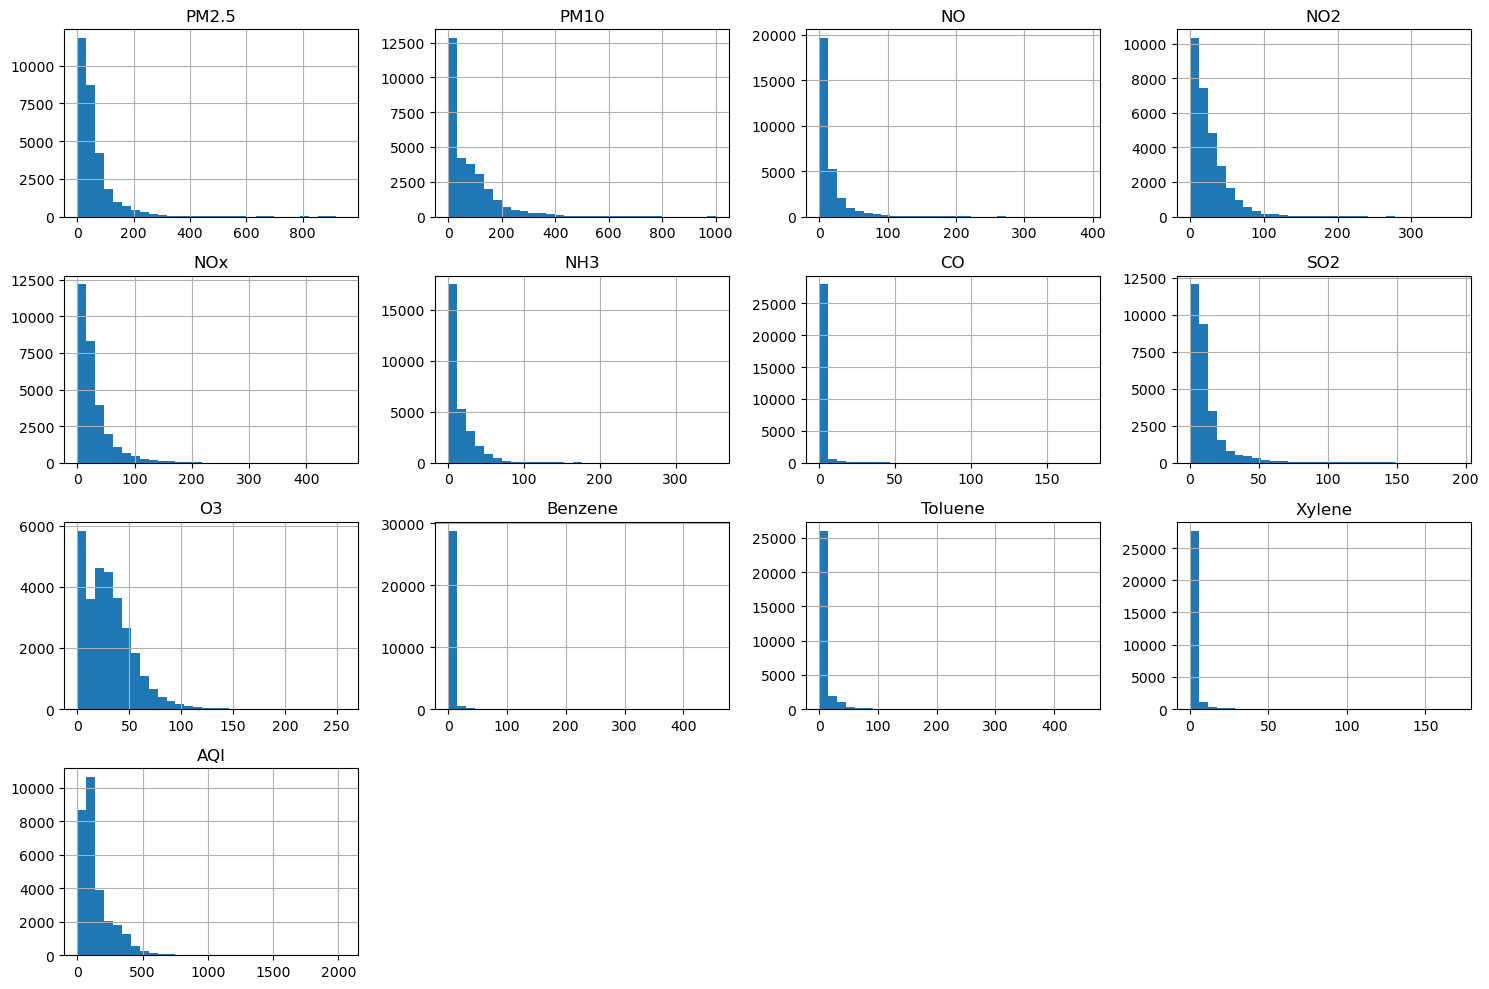

In [12]:
import matplotlib.pyplot as plt

# List of numeric columns
Air_Distribution = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

# Plot histograms
df[Air_Distribution].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

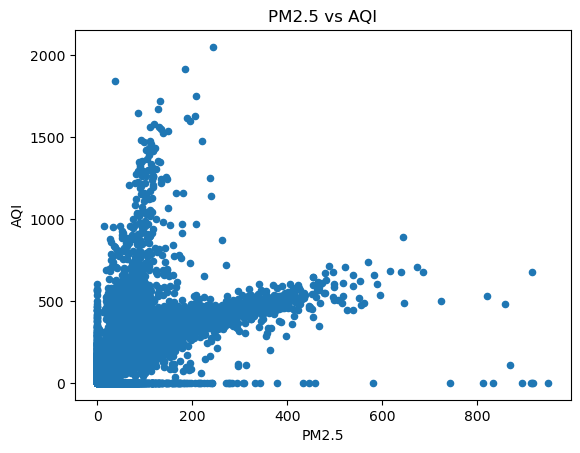

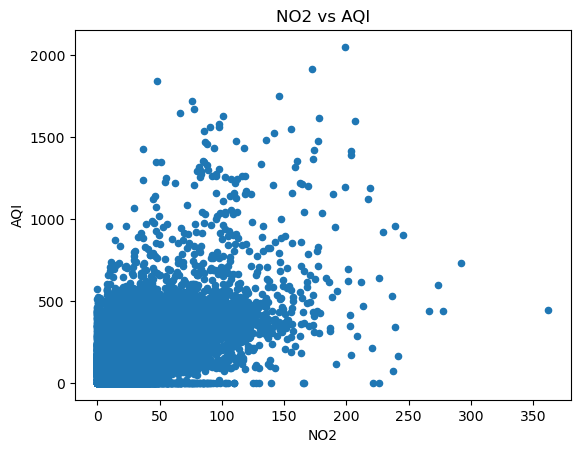

In [13]:
# Scatter plot between PM2.5 and AQI
df.plot.scatter(x='PM2.5', y='AQI')
plt.title('PM2.5 vs AQI')
plt.show()

# Scatter plot between NO2 and AQI
df.plot.scatter(x='NO2', y='AQI')
plt.title('NO2 vs AQI')
plt.show()

In [14]:
df.AQI_Bucket.value_counts()

AQI_Bucket
Moderate        8829
Satisfactory    8224
0               4681
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: count, dtype: int64

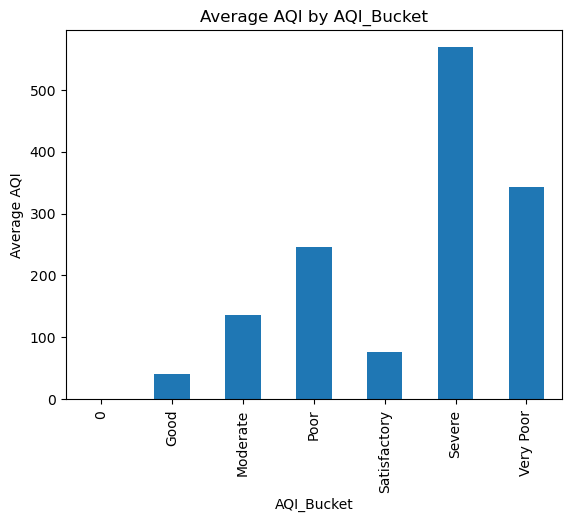

In [15]:
# Bar chart for AQI_Bucket vs average AQI
df.groupby('AQI_Bucket')['AQI'].mean().plot(kind='bar')
plt.title('Average AQI by AQI_Bucket')
plt.ylabel('Average AQI')
plt.show()

In [16]:
df['Year'] = df['Date'].dt.year
average_aqi_per_year = df.groupby('Year')['AQI'].mean().reset_index()
average_aqi_per_year

Year         AQI
0  2015  138.582649
1  2016  145.850201
2  2017  125.161655
3  2018  161.595580
4  2019  148.635509
5  2020  108.023031

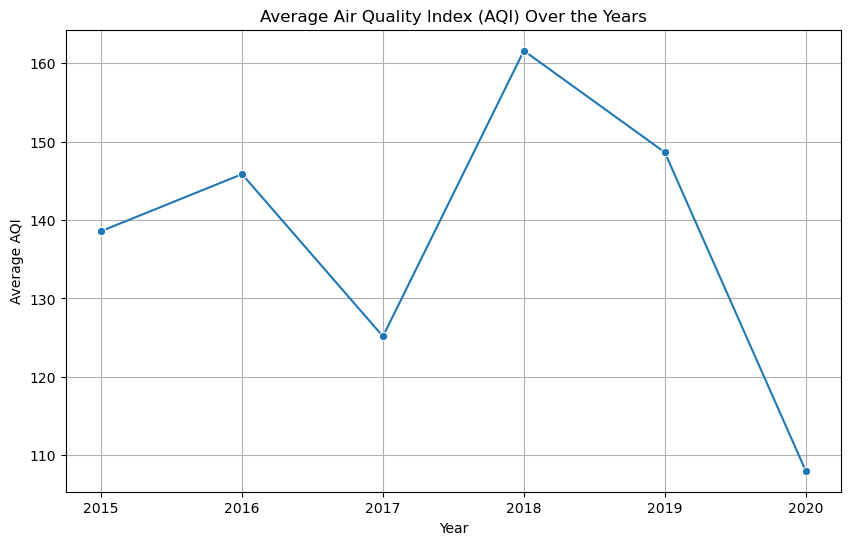

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=average_aqi_per_year, x='Year', y='AQI', marker='o')
plt.title('Average Air Quality Index (AQI) Over the Years')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.grid(True)
plt.show()

In [18]:
# Calculate the average level of each pollutant per city
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
average_pollutants_per_city = df.groupby('City')[pollutants].mean().reset_index()
average_pollutants_per_city

City       PM2.5        PM10         NO        NO2  \
0            Ahmedabad   46.643634   23.213390  15.629283  41.162130   
1               Aizawl   16.826814   23.146195   9.408053   0.388496   
2            Amaravati   35.429769   71.945710   4.179516  20.893239   
3             Amritsar   49.653473  109.258485  17.301474  17.854652   
4            Bengaluru   33.216695   68.326620   9.381035  27.911434   
5               Bhopal   48.500623  115.608339   6.818062  30.369170   
6         Brajrajnagar   51.423646  101.307345  12.819574  12.399211   
7           Chandigarh   39.100789   85.656546  10.363257  11.458289   
8              Chennai   47.488930    9.445490   9.025874  16.555545   
9           Coimbatore   28.547409   37.293342   6.325984  27.964249   
10               Delhi  117.079482  223.886227  38.946784  50.734624   
11           Ernakulam   24.328827   47.142160  22.611358   2.461111   
12            Gurugram  106.363079   84.403383  16.093109  21.484521   
13            Guwahati   63.558566  116.604900  20.003446  13.541713   
14           Hyderabad   44.338913   75.662493   7.708081  27.990528   
15              Jaipur   53.913627  121.931652  14.422819  32.011212   
16          Jorapokhar   20.823576  114.451839   8.471044   7.185038   
17               Kochi   31.428519   67.335432  70.885556  14.392160   
18             Kolkata   60.013993  107.816695  25.989398  39.155541   
19             Lucknow  104.143708    0.000000  15.051349  32.847257   
20              Mumbai   13.735958   36.742897  11.840637   9.616595   
21               Patna  102.162158   13.029526  28.363149  33.371663   
22            Shillong   24.460323   32.806452   0.742548   2.227387   
23             Talcher   49.190724  133.693449  24.271103  10.488778   
24  Thiruvananthapuram   26.977680   51.057167   3.358660   9.118606   
25       Visakhapatnam   39.580410   88.848399  10.763995  30.884083   

          NOx        NH3         CO        SO2         O3    Benzene  \
0   33.361951   0.000000  15.465789  37.651747  25.804759   4.112230   
1   12.610354  22.308938   0.283628   7.378053   3.412389   8.507168   
2   14.490904  11.295152   0.563859  13.283796  35.910757   0.503323   
3   27.210655  13.881065   0.516986   7.027690  20.304881   3.514357   
4   19.677835  19.756486   1.828566   5.502539  30.512185   2.795874   
5   21.730484  18.478131   0.852976  12.657958  57.987163   0.000000   
6   19.963795  27.824072   1.510704   7.770256  13.007196   3.949424   
7   14.860526  29.764737   0.631349  10.159375  20.047204   5.065724   
8   17.351344  48.860722   1.054067   7.736028  31.652504   1.466735   
9   30.566969   6.529197   0.941943   8.535026  28.609378   0.009067   
10  58.567023  41.809009   1.976053  15.030602  49.177675   3.544480   
11  23.687901  20.125679   1.587654   3.105432   0.000000   0.588765   
12  21.468708   1.849458   1.175878   8.437898  32.032073   1.270280   
13  44.217410  11.046056   0.733805  14.635179  25.020319   3.993028   
14  19.370922  13.298280   0.589307   9.054811  33.175369   1.099068   
15  35.652110  26.156490   0.795862  10.951804  46.086445   1.540144   
16   0.000000   4.800624   0.372079  23.542994  24.268751   0.000000   
17  68.412901   7.223148   1.296667  17.595988   3.819691   0.000000   
18  63.287850  18.370381   0.799251   7.752899  28.779742  10.856462   
19  18.892549  14.668397   2.100637   9.632713  36.421344   2.745132   
20  41.368133   2.720816   0.561289   5.968561  13.114973   0.983768   
21  40.931830   1.888568   1.408956  19.690544  31.675807   1.504279   
22   0.895516   2.278129   0.214161   5.471355  22.917677  34.341355   
23  26.516562   9.198649   1.552086  22.580195  14.060562   0.053708   
24   8.063777   4.547518   0.937689   5.498867  33.714505   0.000000   
25  24.579904   9.378222   0.717086  10.694453  31.646224   3.790205   

      Toluene    Xylene  
0   21.071200  3.224848  
1    8.887080  0.000000  
2    1.729558  0.703954  
3    2.509083  6.072817 

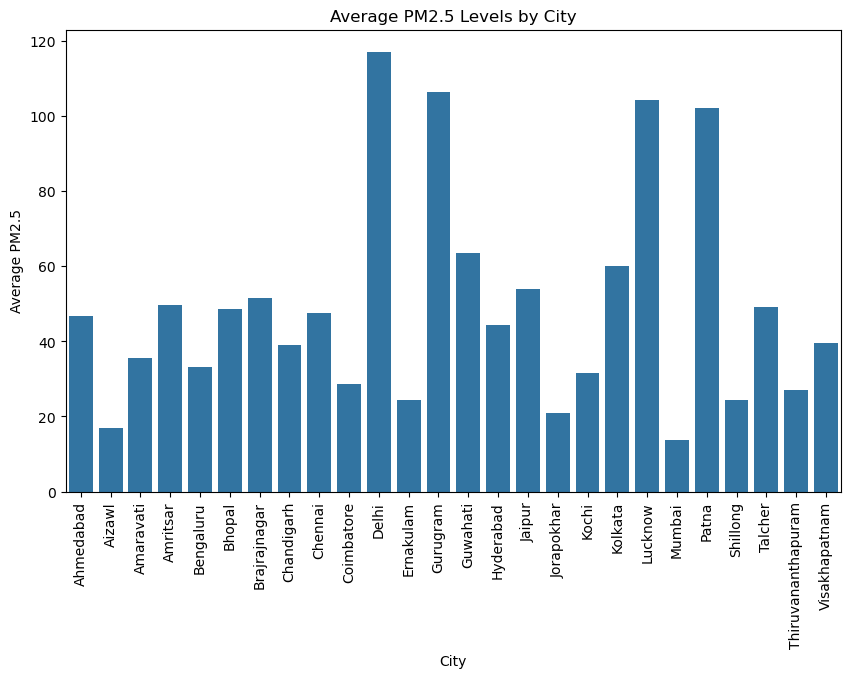

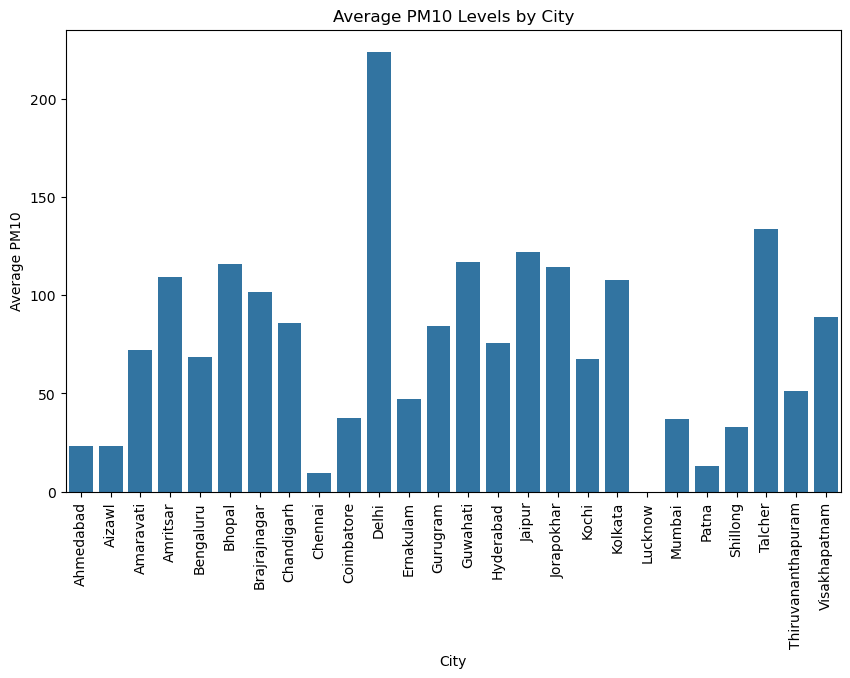

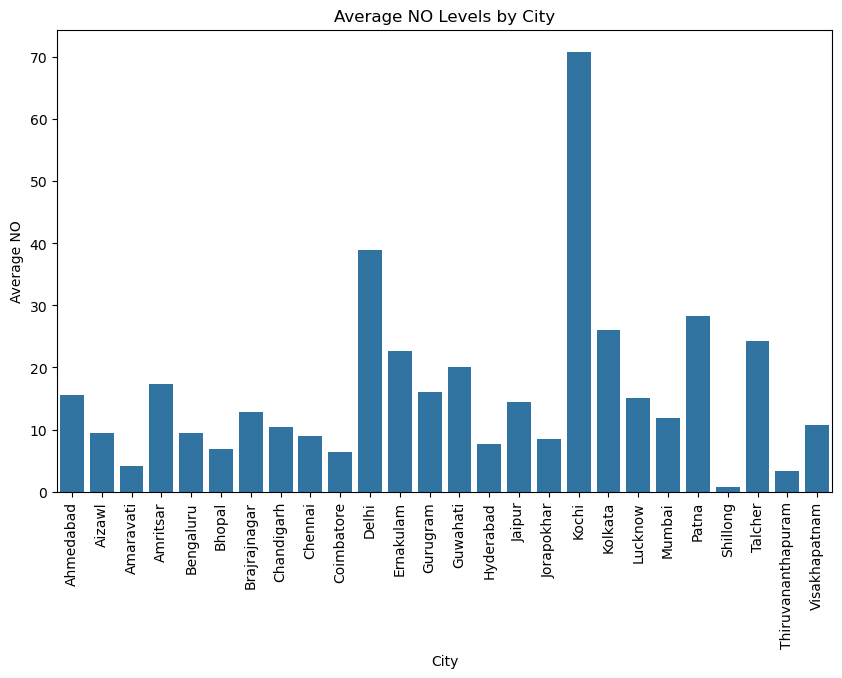

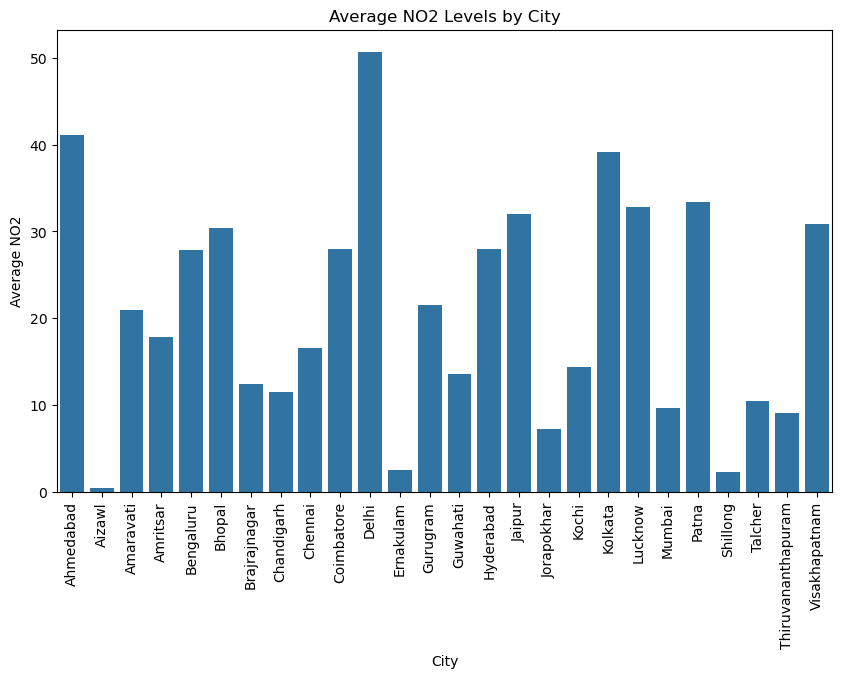

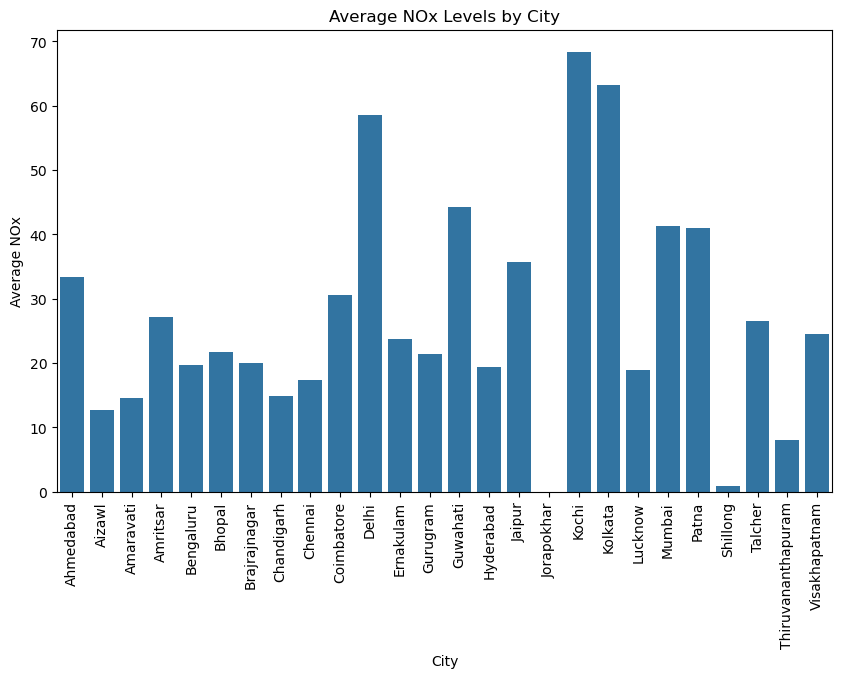

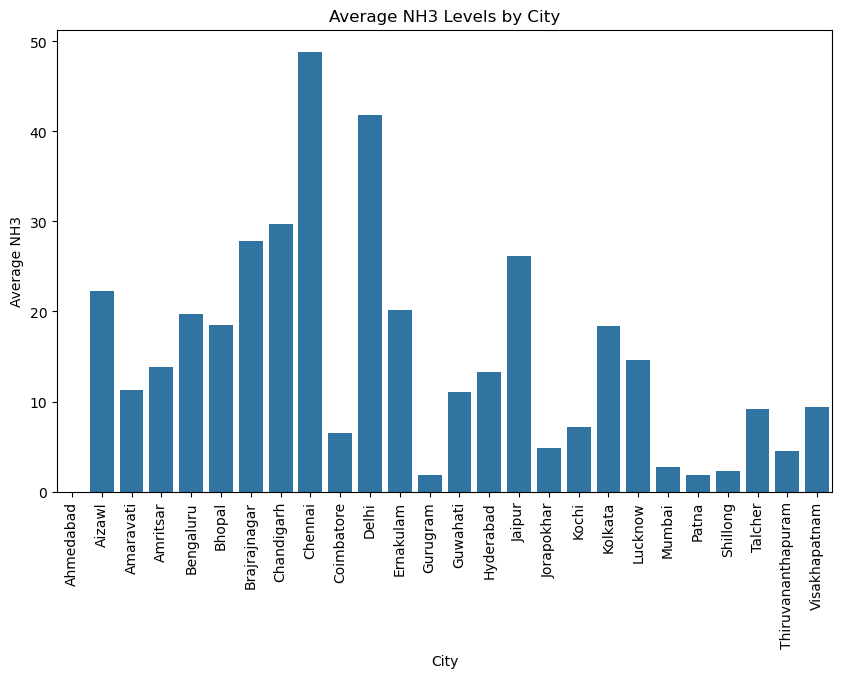

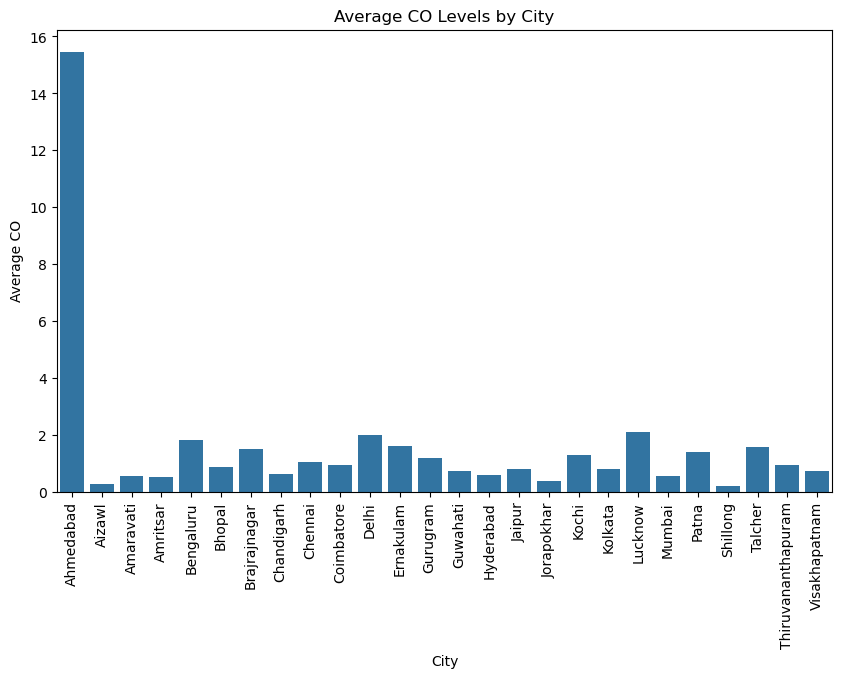

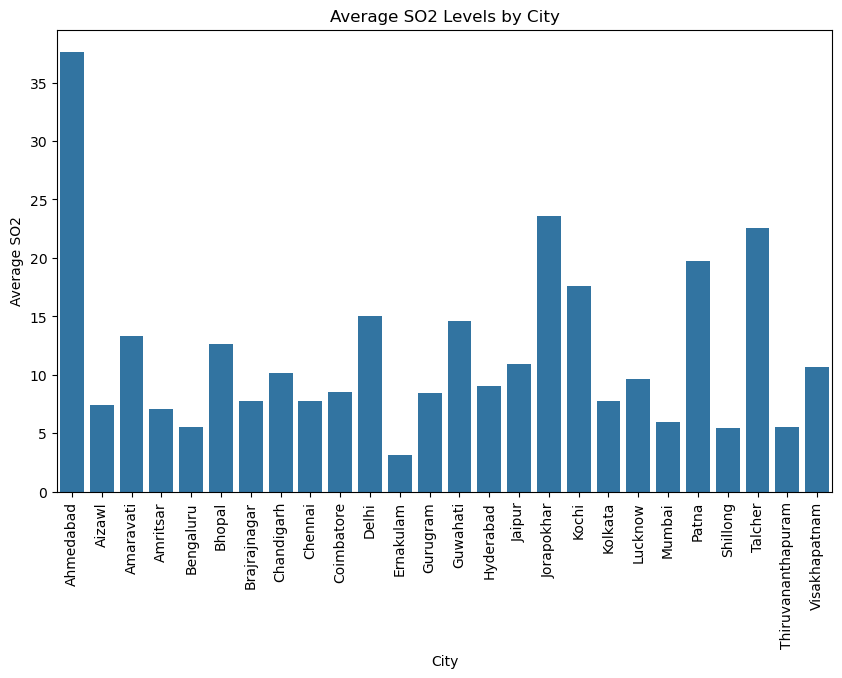

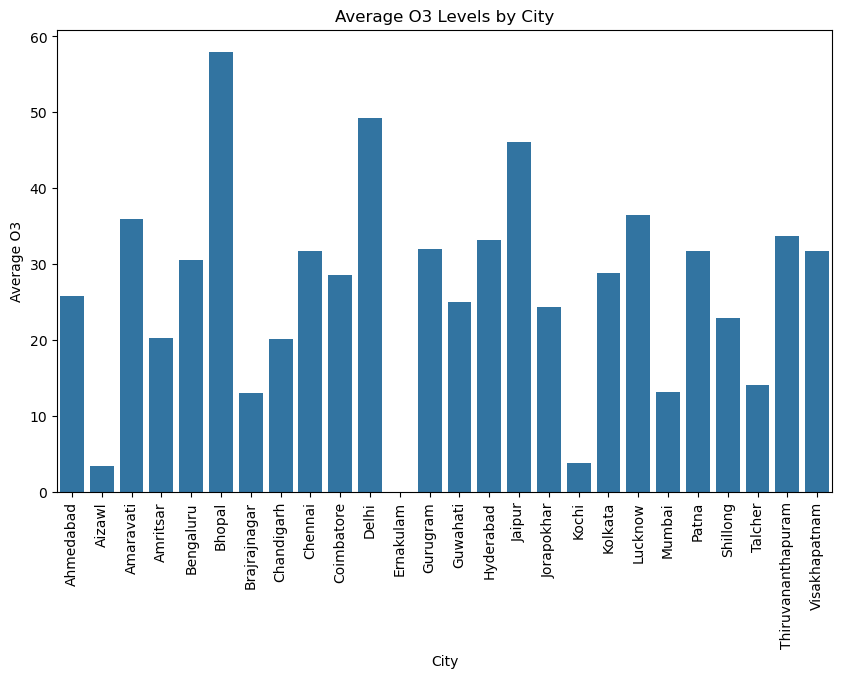

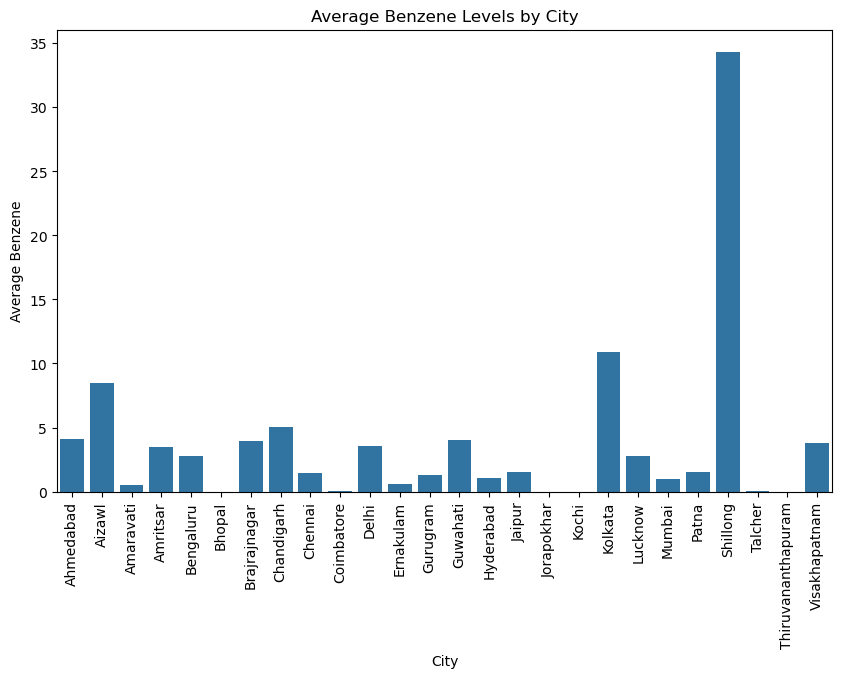

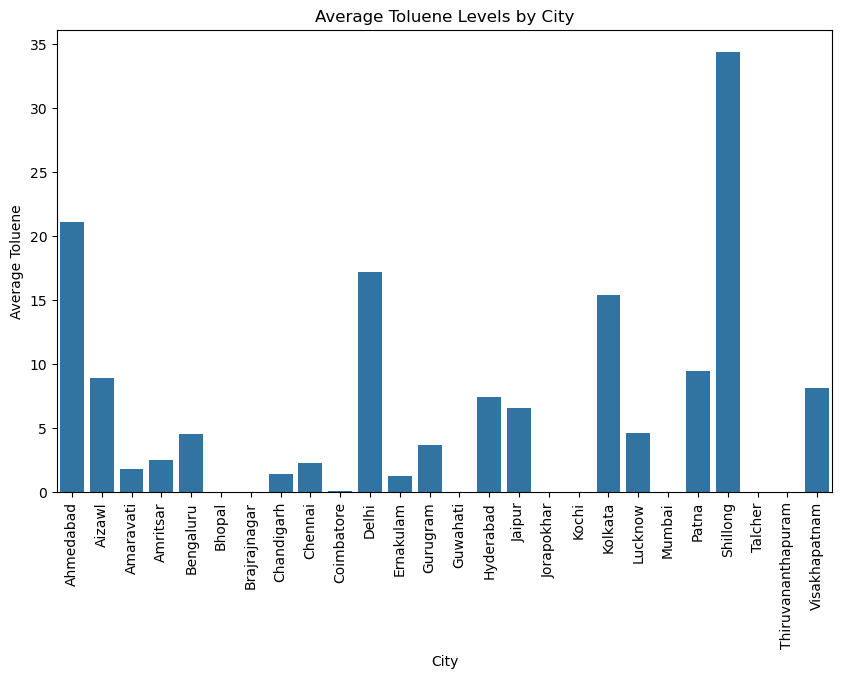

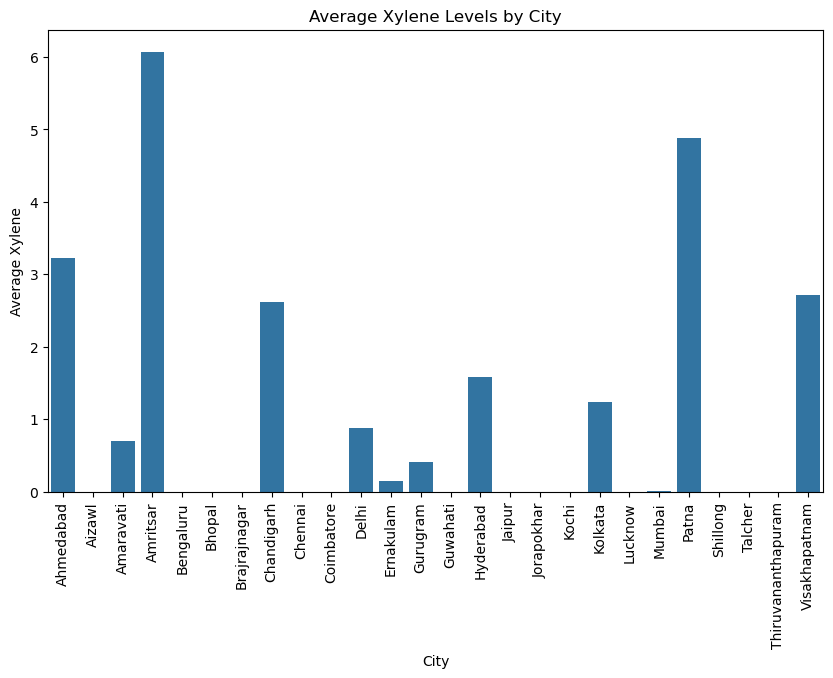

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt



# Plot bar charts for average pollutant levels per city
for pollutant in pollutants:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=average_pollutants_per_city, x='City', y=pollutant)
    plt.title(f'Average {pollutant} Levels by City')
    plt.xlabel('City')
    plt.ylabel(f'Average {pollutant}')
    plt.xticks(rotation=90)
    plt.show()

In [1]:
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df['Month'] = df['Month'].map(month_map)

NameError: name 'df' is not defined

df['Month']

In [22]:
# Calculate the average AQI per month per city
average_aqi_per_month_city = df.groupby(['City', 'Month'])['AQI'].mean().reset_index()
average_aqi_per_month_city

City Month         AQI
0        Ahmedabad   Apr  250.727778
1        Ahmedabad   Aug  301.180645
2        Ahmedabad   Dec  266.148387
3        Ahmedabad   Feb  404.858824
4        Ahmedabad   Jan  285.903226
..             ...   ...         ...
288  Visakhapatnam   Mar   99.677419
289  Visakhapatnam   May   63.951613
290  Visakhapatnam   Nov  113.141667
291  Visakhapatnam   Oct   80.145161
292  Visakhapatnam   Sep   64.050000

[293 rows x 3 columns]

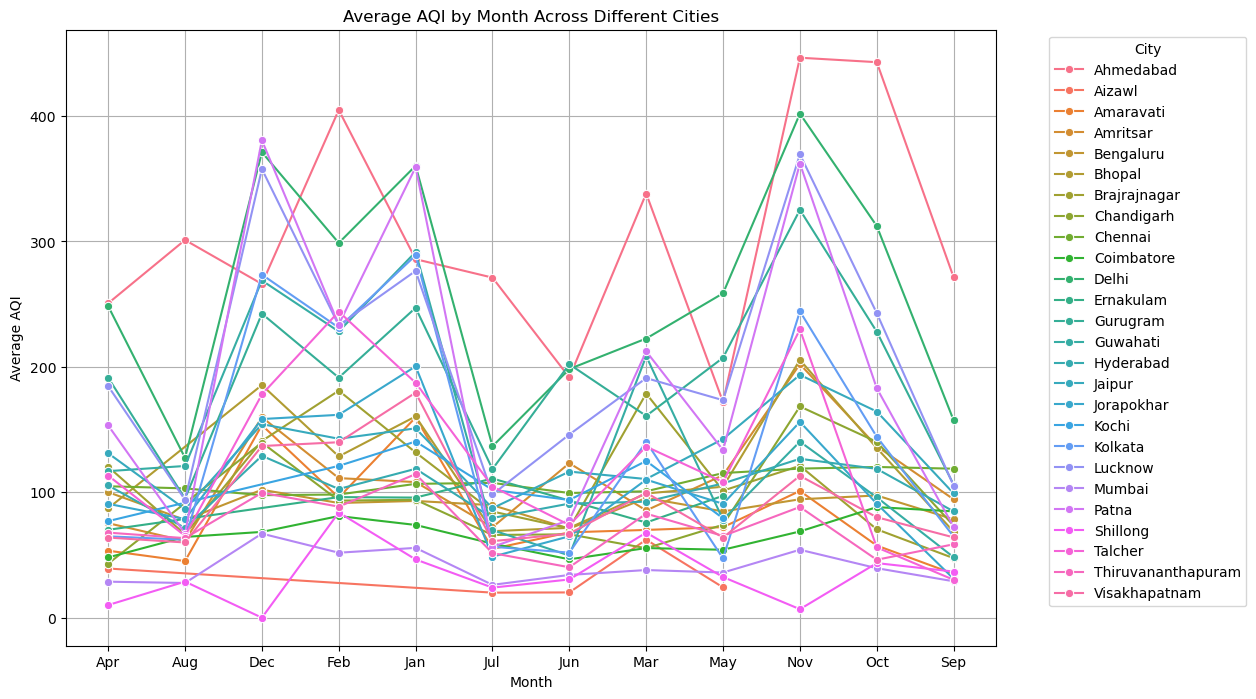

In [23]:
# Plot line charts for average AQI per month for each city
plt.figure(figsize=(12, 8))
sns.lineplot(data=average_aqi_per_month_city, x='Month', y='AQI', hue='City', marker='o')
plt.title('Average AQI by Month Across Different Cities')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.grid(True)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [24]:
# Calculate the correlation matrix
correlation_matrix = df[pollutants].corr()
correlation_matrix

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PM2.5    1.000000  0.368414  0.469201  0.433199  0.382211  0.156542  0.112753   
PM10     0.368414  1.000000  0.404500  0.330189  0.382156  0.225860 -0.050369   
NO       0.469201  0.404500  1.000000  0.498892  0.737456  0.170952  0.233470   
NO2      0.433199  0.330189  0.498892  1.000000  0.592442  0.169636  0.369183   
NOx      0.382211  0.382156  0.737456  0.592442  1.000000  0.157394  0.244745   
NH3      0.156542  0.225860  0.170952  0.169636  0.157394  1.000000 -0.073566   
CO       0.112753 -0.050369  0.233470  0.369183  0.244745 -0.073566  1.000000   
SO2      0.164249  0.148613  0.215860  0.432338  0.218174 -0.057805  0.478023   
O3       0.287599  0.280985  0.120967  0.393205  0.165240  0.150708  0.071831   
Benzene  0.045836  0.042174  0.056948  0.064258  0.067660  0.025507  0.069523   
Toluene  0.167762  0.108695  0.170338  0.330047  0.208759  0.019561  0.290802   
Xylene   0.108134  0.016662  0.100570  0.219805  0.112985 -0.052817  0.194980   

              SO2        O3   Benzene   Toluene    Xylene  
PM2.5    0.164249  0.287599  0.045836  0.167762  0.108134  
PM10     0.148613  0.280985  0.042174  0.108695  0.016662  
NO       0.215860  0.120967  0.056948  0.170338  0.100570  
NO2      0.432338  0.393205  0.064258  0.330047  0.219805  
NOx      0.218174  0.165240  0.067660  0.208759  0.112985  
NH3     -0.057805  0.150708  0.025507  0.019561 -0.052817  
CO       0.478023  0.071831  0.069523  0.290802  0.194980  
SO2      1.000000  0.241047  0.049392  0.284870  0.266901  
O3       0.241047  1.000000  0.050669  0.175583  0.108790  
Benzene  0.049392  0.050669  1.000000  0.690560  0.096732  
Toluene  0.284870  0.175583  0.690560  1.000000  0.309082  
Xylene   0.266901  0.108790  0.096732  0.309082  1.000000

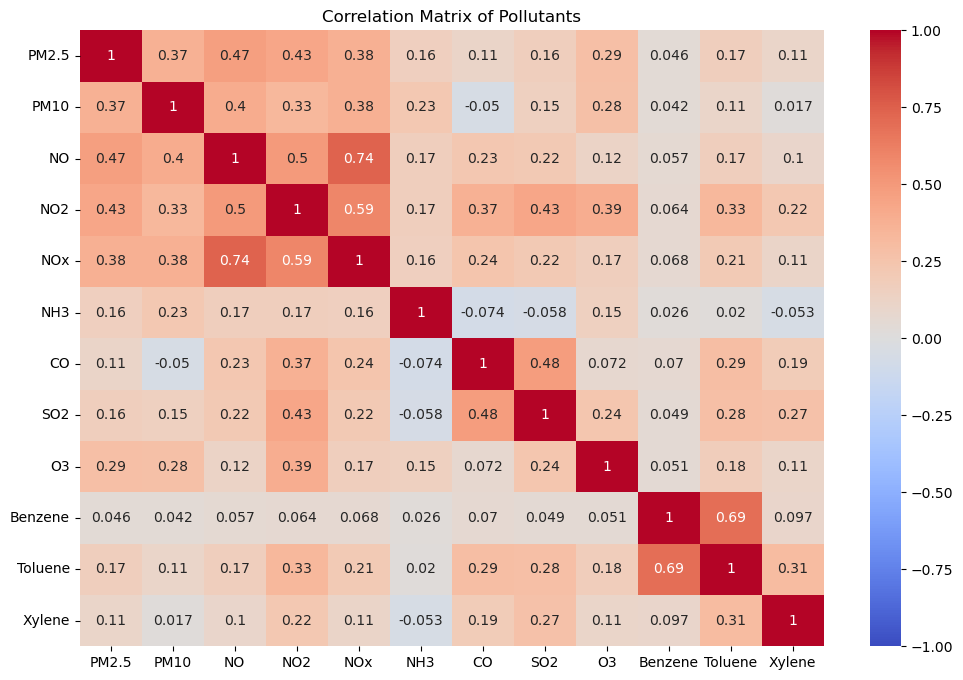

In [25]:
# Plot a heatmap of the correlations between pollutants
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Pollutants')
plt.show()

In [26]:
# how much is the average amount of pollution in each city stations
most_polluted = df[['City', 'AQI', 'PM10', 'CO']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)
most_polluted

AQI        PM10         CO
City                                                 
Ahmedabad           300.215032   23.213390  15.465789
Delhi               258.196117  223.886227   1.976053
Lucknow             205.387257    0.000000   2.100637
Gurugram            194.821322   84.403383   1.175878
Patna               189.074812   13.029526   1.408956
Guwahati            138.157371  116.604900   0.733805
Jaipur              131.279174  121.931652   0.795862
Talcher             130.459459  133.693449   1.552086
Kolkata             130.205160  107.816695   0.799251
Bhopal              127.771626  115.608339   0.852976
Brajrajnagar        114.232409  101.307345   1.510704
Amritsar            110.590500  109.258485   0.516986
Chennai             107.378298    9.445490   1.054067
Jorapokhar          105.032506  114.451839   0.372079
Hyderabad           102.347956   75.662493   0.589307
Kochi               101.709877   67.335432   1.296667
Chandigarh           94.911184   85.656546   0.631349
Visakhapatnam        93.928181   88.848399   0.717086
Bengaluru            89.670483   68.326620   1.828566
Ernakulam            87.228395   47.142160   1.587654
Amaravati            84.276551   71.945710   0.563859
Thiruvananthapuram   71.784173   51.057167   0.937689
Coimbatore           65.077720   37.293342   0.941943
Mumbai               40.641115   36.742897   0.561289
Shillong             35.574194   32.806452   0.214161
Aizawl               34.150442   23.146195   0.283628

In [27]:
df.reset_index(drop=True,inplace=True)
df.head()

City       Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    0.0   0.0   0.92  18.22  17.15  0.0   0.92  27.64   
1  Ahmedabad 2015-01-02    0.0   0.0   0.97  15.69  16.46  0.0   0.97  24.55   
2  Ahmedabad 2015-01-03    0.0   0.0  17.40  19.30  29.70  0.0  17.40  29.07   
3  Ahmedabad 2015-01-04    0.0   0.0   1.70  18.48  17.97  0.0   1.70  18.59   
4  Ahmedabad 2015-01-05    0.0   0.0  22.10  21.42  37.76  0.0  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket Month  Year  
0  133.36     0.00     0.02    0.00  0.0          0   Jan  2015  
1   34.06     3.68     5.50    3.77  0.0          0   Jan  2015  
2   30.70     6.80    16.40    2.25  0.0          0   Jan  2015  
3   36.08     4.43    10.14    1.00  0.0          0   Jan  2015  
4   39.31     7.01    18.89    2.78  0.0          0   Jan  2015

In [28]:
# data for 2020
df=df[df['Date'] >= ('2020-01-01')]
print(df.shape)
df.head()

(4646, 18)


City       Date  PM2.5    PM10    NO    NO2    NOx  NH3    CO  \
1826  Ahmedabad 2020-01-01  79.57  131.62  3.78  12.64   8.99  0.0  3.78   
1827  Ahmedabad 2020-01-02  72.59  128.86  3.63  14.38   9.73  0.0  3.63   
1828  Ahmedabad 2020-01-03  69.54  128.99  7.06  15.13  12.65  0.0  7.06   
1829  Ahmedabad 2020-01-04  66.20  138.47  8.97  20.79  16.84  0.0  8.97   
1830  Ahmedabad 2020-01-05  55.99  110.41  5.41  15.34  11.53  0.0  5.41   

        SO2     O3  Benzene  Toluene  Xylene    AQI AQI_Bucket Month  Year  
1826  27.70  23.67     4.21    31.42    2.52  216.0       Poor   Jan  2020  
1827  23.96  23.67     3.71    31.14    2.52  162.0   Moderate   Jan  2020  
1828  35.78  23.66     4.78    31.14    2.52  220.0       Poor   Jan  2020  
1829  38.98  23.65     4.12    31.14    2.52  254.0       Poor   Jan  2020  
1830  45.83  23.61     3.30    31.14    2.52  255.0       Poor   Jan  2020

In [29]:
df.reset_index(drop=True,inplace=True)
df.head()

City       Date  PM2.5    PM10    NO    NO2    NOx  NH3    CO    SO2  \
0  Ahmedabad 2020-01-01  79.57  131.62  3.78  12.64   8.99  0.0  3.78  27.70   
1  Ahmedabad 2020-01-02  72.59  128.86  3.63  14.38   9.73  0.0  3.63  23.96   
2  Ahmedabad 2020-01-03  69.54  128.99  7.06  15.13  12.65  0.0  7.06  35.78   
3  Ahmedabad 2020-01-04  66.20  138.47  8.97  20.79  16.84  0.0  8.97  38.98   
4  Ahmedabad 2020-01-05  55.99  110.41  5.41  15.34  11.53  0.0  5.41  45.83   

      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket Month  Year  
0  23.67     4.21    31.42    2.52  216.0       Poor   Jan  2020  
1  23.67     3.71    31.14    2.52  162.0   Moderate   Jan  2020  
2  23.66     4.78    31.14    2.52  220.0       Poor   Jan  2020  
3  23.65     4.12    31.14    2.52  254.0       Poor   Jan  2020  
4  23.61     3.30    31.14    2.52  255.0       Poor   Jan  2020

In [30]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
Month         0
Year          0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4646 entries, 0 to 4645
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        4646 non-null   object        
 1   Date        4646 non-null   datetime64[ns]
 2   PM2.5       4646 non-null   float64       
 3   PM10        4646 non-null   float64       
 4   NO          4646 non-null   float64       
 5   NO2         4646 non-null   float64       
 6   NOx         4646 non-null   float64       
 7   NH3         4646 non-null   float64       
 8   CO          4646 non-null   float64       
 9   SO2         4646 non-null   float64       
 10  O3          4646 non-null   float64       
 11  Benzene     4646 non-null   float64       
 12  Toluene     4646 non-null   float64       
 13  Xylene      4646 non-null   float64       
 14  AQI         4646 non-null   float64       
 15  AQI_Bucket  4646 non-null   object        
 16  Month       4646 non-nul

In [32]:
for i in df.columns:
    print('column name:{}    unique values:{}'.format(i,len(df[i].unique())))

column name:City    unique values:26
column name:Date    unique values:183
column name:PM2.5    unique values:3447
column name:PM10    unique values:3762
column name:NO    unique values:2370
column name:NO2    unique values:2776
column name:NOx    unique values:2940
column name:NH3    unique values:2489
column name:CO    unique values:368
column name:SO2    unique values:1898
column name:O3    unique values:3080
column name:Benzene    unique values:925
column name:Toluene    unique values:1359
column name:Xylene    unique values:456
column name:AQI    unique values:382
column name:AQI_Bucket    unique values:7
column name:Month    unique values:7
column name:Year    unique values:1


In [33]:
df['PM2.5']=df['PM2.5'].fillna(df['PM2.5'].mean())
df['PM10']=df['PM10'].fillna(df['PM10'].mean())
df['NO']=df['NO'].fillna(df['NO'].mean())
df['NO2']=df['NO2'].fillna(df['NO2'].mean())
df['NOx']=df['NOx'].fillna(df['NOx'].mean())
df['NH3']=df['NH3'].fillna(df['NH3'].mean())
df['CO']=df['CO'].fillna(df['CO'].mean())
df['SO2']=df['SO2'].fillna(df['SO2'].mean())
df['O3']=df['O3'].fillna(df['O3'].mean())
df['Benzene']=df['Benzene'].fillna(df['Benzene'].mean())
df['Toluene']=df['Toluene'].fillna(df['Toluene'].mean())
df['Xylene']=df['Xylene'].fillna(df['Xylene'].mean())
df['AQI']=df['AQI'].fillna(df['AQI'].mode()[0])
df['AQI_Bucket']=df['AQI_Bucket'].fillna('Moderate')

C:\Users\mihul\AppData\Local\Temp\ipykernel_10148\1150745639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PM2.5']=df['PM2.5'].fillna(df['PM2.5'].mean())
C:\Users\mihul\AppData\Local\Temp\ipykernel_10148\1150745639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PM10']=df['PM10'].fillna(df['PM10'].mean())
C:\Users\mihul\AppData\Local\Temp\ipykernel_10148\1150745639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [34]:
df.head()

City       Date  PM2.5    PM10    NO    NO2    NOx  NH3    CO    SO2  \
0  Ahmedabad 2020-01-01  79.57  131.62  3.78  12.64   8.99  0.0  3.78  27.70   
1  Ahmedabad 2020-01-02  72.59  128.86  3.63  14.38   9.73  0.0  3.63  23.96   
2  Ahmedabad 2020-01-03  69.54  128.99  7.06  15.13  12.65  0.0  7.06  35.78   
3  Ahmedabad 2020-01-04  66.20  138.47  8.97  20.79  16.84  0.0  8.97  38.98   
4  Ahmedabad 2020-01-05  55.99  110.41  5.41  15.34  11.53  0.0  5.41  45.83   

      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket Month  Year  
0  23.67     4.21    31.42    2.52  216.0       Poor   Jan  2020  
1  23.67     3.71    31.14    2.52  162.0   Moderate   Jan  2020  
2  23.66     4.78    31.14    2.52  220.0       Poor   Jan  2020  
3  23.65     4.12    31.14    2.52  254.0       Poor   Jan  2020  
4  23.61     3.30    31.14    2.52  255.0       Poor   Jan  2020

In [35]:
# how much is the average amount of pollution in each city stations
most_polluted = df[['City', 'AQI', 'PM10', 'CO']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)
most_polluted

AQI        PM10        CO
City                                                
Ahmedabad           232.808743  105.806011  8.823169
Delhi               181.672131  157.034208  1.057760
Patna               162.251366  123.660984  1.133333
Guwahati            161.508197  126.922186  0.774590
Gurugram            158.655738  134.434754  1.126885
Lucknow             157.125683    0.000000  1.196995
Talcher             136.983607  108.542022  1.563497
Jorapokhar          128.661202  127.853716  0.865410
Kolkata             117.295082   94.280219  0.643005
Bhopal              108.480874   99.525355  0.664372
Jaipur              105.120219   97.434044  0.771421
Mumbai              103.568306   94.733661  0.626776
Kochi               101.709877   67.335432  1.296667
Brajrajnagar         90.655738  113.965082  0.391202
Amritsar             88.404372   85.571803  0.662514
Ernakulam            87.228395   47.142160  1.587654
Visakhapatnam        82.371585   82.224973  0.627650
Chennai              80.251366   49.656503  0.820710
Bengaluru            79.715847   67.031639  0.871311
Hyderabad            78.174863   77.971585  0.464645
Chandigarh           71.005464   67.242568  0.552295
Thiruvananthapuram   66.464481   51.074262  0.747104
Amaravati            59.879781   50.295246  0.409180
Coimbatore           58.136612   36.717268  0.639399
Shillong             44.950820   33.381148  0.219563
Aizawl               34.150442   23.146195  0.283628

In [36]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [37]:
import matplotlib.pyplot as plt

# Use a different valid style (e.g., 'ggplot' or 'bmh')
plt.style.use('ggplot')


In [38]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [39]:
df1=df.copy()
df1['Vehicle_Pollution_content']=df1['PM2.5']+df1['PM10']+df1['NO']+df1['NOx']+df1['NH3']+df1['CO']
df1['Industry_pollutants']=df1['SO2']+df1['O3']+df1['Benzene']+df1['Toluene']+df1['Xylene']
df1.drop(['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene'],axis=1,inplace=True)
df1.head()

City       Date    AQI AQI_Bucket Month  Year  \
0  Ahmedabad 2020-01-01  216.0       Poor   Jan  2020   
1  Ahmedabad 2020-01-02  162.0   Moderate   Jan  2020   
2  Ahmedabad 2020-01-03  220.0       Poor   Jan  2020   
3  Ahmedabad 2020-01-04  254.0       Poor   Jan  2020   
4  Ahmedabad 2020-01-05  255.0       Poor   Jan  2020   

   Vehicle_Pollution_content  Industry_pollutants  
0                     227.74                89.52  
1                     218.44                85.00  
2                     225.30                97.88  
3                     239.45               100.41  
4                     188.75               106.40

In [40]:
df1['Day_date'] = pd.to_datetime(df1['Date'], format='%Y-%m-%d').dt.day
df1['month_date'] = pd.to_datetime(df1['Date'], format='%Y-%m-%d').dt.month
df1.drop(['Date'], axis=1, inplace=True)


In [41]:
df1.describe()

AQI    Year  Vehicle_Pollution_content  Industry_pollutants  \
count  4646.000000  4646.0                4646.000000          4646.000000   
mean    108.023031  2020.0                 186.021890            56.382632   
std      84.974931     0.0                 131.456725            65.889036   
min       0.000000  2020.0                   0.000000             0.000000   
25%      61.000000  2020.0                 100.112500            33.060000   
50%      90.000000  2020.0                 149.790000            48.180000   
75%     129.000000  2020.0                 235.017500            68.770000   
max    1291.000000  2020.0                1160.540000           968.420000   

          Day_date   month_date  
count  4646.000000  4646.000000  
mean     15.659923     3.569307  
std       8.818621     1.710550  
min       1.000000     1.000000  
25%       8.000000     2.000000  
50%      16.000000     4.000000  
75%      23.000000     5.000000  
max      31.000000     7.000000

In [42]:
outliers=df1.loc[df1['Vehicle_Pollution_content'] > (1000)]
outliers

City    AQI AQI_Bucket Month  Year  Vehicle_Pollution_content  \
1159  Brajrajnagar    0.0          0   May  2020                    1031.71   
1162  Brajrajnagar  178.0   Moderate   May  2020                    1010.67   
1760         Delhi  492.0     Severe   Jan  2020                    1160.54   
1761         Delhi  485.0     Severe   Jan  2020                    1092.40   
2302      Guwahati  462.0     Severe   Jan  2020                    1154.02   

      Industry_pollutants  Day_date  month_date  
1159                51.55        11           5  
1162                85.87        14           5  
1760               128.74         1           1  
1761               141.57         2           1  
2302                34.07        15           1

In [43]:
outliers=df1.loc[df1['Industry_pollutants']>(800)]
outliers

City   AQI    AQI_Bucket Month  Year  Vehicle_Pollution_content  \
3938  Shillong  68.0  Satisfactory   Jan  2020                     102.99   
3939  Shillong  74.0  Satisfactory   Jan  2020                     105.60   
3971  Shillong  60.0  Satisfactory   Feb  2020                      50.26   
3972  Shillong  42.0          Good   Feb  2020                      46.68   
3973  Shillong  51.0  Satisfactory   Feb  2020                      49.98   
3974  Shillong  53.0  Satisfactory   Mar  2020                      69.49   
3975  Shillong  60.0  Satisfactory   Mar  2020                      88.69   
3976  Shillong  63.0  Satisfactory   Mar  2020                      71.86   
3977  Shillong  64.0  Satisfactory   Mar  2020                      90.79   
3978  Shillong  63.0  Satisfactory   Mar  2020                      65.67   
3979  Shillong  64.0  Satisfactory   Mar  2020                      68.64   
3980  Shillong  65.0  Satisfactory   Mar  2020                      67.12   
3981  Shillong  73.0  Satisfactory   Mar  2020                      61.44   
3982  Shillong  65.0  Satisfactory   Mar  2020                      76.82   
3983  Shillong  71.0  Satisfactory   Mar  2020                     105.45   
3984  Shillong  66.0  Satisfactory   Mar  2020                      67.77   
3985  Shillong  56.0  Satisfactory   Mar  2020                      81.46   
3986  Shillong  59.0  Satisfactory   Mar  2020                      99.15   
3987  Shillong  86.0  Satisfactory   Mar  2020                     134.39   
3988  Shillong  77.0  Satisfactory   Mar  2020                      73.96   

      Industry_pollutants  Day_date  month_date  
3938               907.58        25           1  
3939               922.66        26           1  
3971               845.73        27           2  
3972               839.01        28           2  
3973               941.27        29           2  
3974               905.90         1           3  
3975               914.00         2           3  
3976               913.07         3           3  
3977               944.41         4           3  
3978               915.70         5           3  
3979               965.93         6           3  
3980               890.48         7           3  
3981               899.37         8           3  
3982               943.76         9           3  
3983               968.42        10           3  
3984               957.11        11           3  
3985               907.26        12           3  
3986               902.11        13           3  
3987               916.24        14           3  
3988               920.82        15           3

In [61]:
sns.pairplot(data=df1)

In [45]:
df1.drop(['AQI_Bucket'],axis=1,inplace=True)
df1.head()

City    AQI Month  Year  Vehicle_Pollution_content  \
0  Ahmedabad  216.0   Jan  2020                     227.74   
1  Ahmedabad  162.0   Jan  2020                     218.44   
2  Ahmedabad  220.0   Jan  2020                     225.30   
3  Ahmedabad  254.0   Jan  2020                     239.45   
4  Ahmedabad  255.0   Jan  2020                     188.75   

   Industry_pollutants  Day_date  month_date  
0                89.52         1           1  
1                85.00         2           1  
2                97.88         3           1  
3               100.41         4           1  
4               106.40         5           1

In [46]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [47]:
df1=pd.get_dummies(df1,drop_first=True)
print(df1.shape)
df1.head()

(4646, 37)


AQI  Year  Vehicle_Pollution_content  Industry_pollutants  Day_date  \
0  216.0  2020                     227.74                89.52         1   
1  162.0  2020                     218.44                85.00         2   
2  220.0  2020                     225.30                97.88         3   
3  254.0  2020                     239.45               100.41         4   
4  255.0  2020                     188.75               106.40         5   

   month_date  City_Aizawl  City_Amaravati  City_Amritsar  City_Bengaluru  \
0           1        False           False          False           False   
1           1        False           False          False           False   
2           1        False           False          False           False   
3           1        False           False          False           False   
4           1        False           False          False           False   

   City_Bhopal  City_Brajrajnagar  City_Chandigarh  City_Chennai  \
0        False              False            False         False   
1        False              False            False         False   
2        False              False            False         False   
3        False              False            False         False   
4        False              False            False         False   

   City_Coimbatore  City_Delhi  City_Ernakulam  City_Gurugram  City_Guwahati  \
0            False       False           False          False          False   
1            False       False           False          False          False   
2            False       False           False          False          False   
3            False       False           False          False          False   
4            False       False           False          False          False   

   City_Hyderabad  City_Jaipur  City_Jorapokhar  City_Kochi  City_Kolkata  \
0           False        False            False       False         False   
1           False        False            False       False         False   
2           False        False            False       False         False   
3           False        False            False       False         False   
4           False        False            False       False         False   

   City_Lucknow  City_Mumbai  City_Patna  City_Shillong  City_Talcher  \
0         False        False       False          False         False   
1         False        False       False          False         False   
2         False        False       False          False         False   
3         False        False       False          False         False   
4         False        False       False          False         False   

   City_Thiruvananthapuram  City_Visakhapatnam  Month_Feb  Month_Jan  \
0                    False               False      False       True   
1                    False               False      False       True   
2                    False               False      False       True   
3                    False               False      False       True   
4                    False               False      False       True   

   Month_Jul  Month_Jun  Month_Mar  Month_May  
0      False      False      False      False  
1      False      False      False      False  
2      False      False      False      False  
3      False      False      False      False  
4      False      False      False      False

In [48]:
X=df1.drop(['AQI'],axis=1)
y=df1['AQI']
print(X.shape)
print(y.shape)

(4646, 36)
(4646,)


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [50]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor()
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.7136979502645117

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
model3=GradientBoostingRegressor()
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.6595413612713688

In [52]:
from sklearn.ensemble import ExtraTreesRegressor
model3=ExtraTreesRegressor()
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.7773977866311218

In [53]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.metrics import mean_squared_error,make_scorer

clf = ExtraTreesRegressor(random_state=12)
param_dist = {"n_estimators": [5, 10],
              "max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(1, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False]}
# rmse = make_scorer(mean_squared_error, greater_is_better=False)
r = RandomizedSearchCV(clf, param_distributions=param_dist,
                       cv=10,
                       scoring='r2',
                       n_iter=3,
                       n_jobs=2)
r.fit(X, y)

I:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "I:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "I:\Anaconda\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "I:\Anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "I:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_paramet

RandomizedSearchCV(cv=10, estimator=ExtraTreesRegressor(random_state=12),
                   n_iter=3, n_jobs=2,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D10D43E950>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D10ED94990>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002D10ED942D0>,
                                        'n_estimators': [5, 10]},
                   scoring='r2')

In [54]:
print(r.best_params_)
r.score(X_test,y_test)

{'bootstrap': False, 'max_depth': 3, 'max_features': 9, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 10}


0.30642711747710794

In [55]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [56]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


I:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
162 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
117 fits failed with the following error:
Traceback (most recent call last):
  File "I:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "I:\Anaconda\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "I:\Anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "I:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_para

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=42, verbose=2)

In [57]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [58]:
rf_random.score(X_test,y_test)

0.8139583728149936

In [59]:
prediction=rf_random.predict(X_test)

C:\Users\mihul\AppData\Local\Temp\ipykernel_10148\1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: xlabel='AQI', ylabel='Density'>

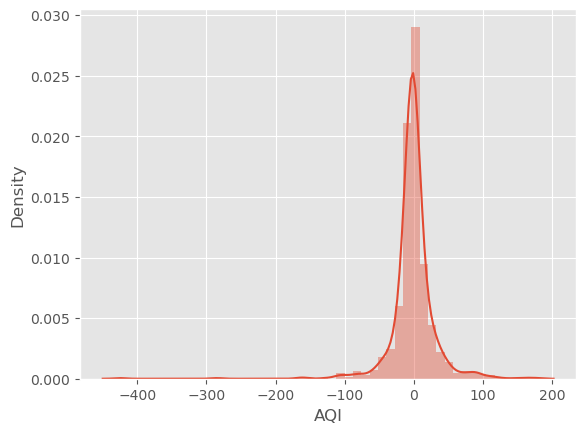

In [60]:
sns.distplot(y_test-prediction)